In [49]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd

In [25]:
stat_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/3ca7/71_native_4x_2/score_analysis.csv"))
rmsd_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/17_synthetic_native/data/scores/4_state_ref.csv"))

In [26]:
stat_df.head()

,Unnamed: 0,min_xray,avg_min_xray,min_xray_r_free_0,avg_min_xray_r_free_0,min_xray_rmsd_ord,avg_min_xray_rmsd_ord,min_xray_rmsd_avg,avg_min_xray_rmsd_avg,pdb
0,0,3.584094,3.669956,0.056468,0.062882,0.162338,0.279456,0.024902,0.030523,/wynton/group/sali/mhancock/xray/sample_bench/...
1,1,3.595500,3.757314,0.054533,0.066271,0.187207,0.636377,0.025441,0.034187,/wynton/group/sali/mhancock/xray/sample_bench/...
2,2,3.568701,3.684670,0.055543,0.062273,0.189973,0.316929,0.024599,0.030834,/wynton/group/sali/mhancock/xray/sample_bench/...
3,3,3.506173,3.697982,0.052604,0.064732,0.161539,0.362941,0.023953,0.031232,/wynton/group/sali/mhancock/xray/sample_bench/...
4,4,3.534153,3.735975,0.056906,0.071107,0.204634,0.416899,0.023394,0.031547,/wynton/group/sali/mhancock/xray/sample_bench/...


In [27]:
rmsd_df.head()

,Unnamed: 0,native,pdb_file,r_free,r_work,r_all,ml,ff,rmsd_avg,rmsd_ord,rmsd_dom,weight_delta
0,0,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.298073,0.299550,0.299457,5.322308,5.429363,0.138440,0.115434,0.143485,0.12
1,1,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.250472,0.249400,0.249483,5.056774,5.429363,0.115498,0.190097,0.160483,0.01
2,2,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.280115,0.286498,0.286029,5.284266,5.429363,0.122712,0.215710,0.152717,0.06
3,3,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.303340,0.300834,0.301023,5.331116,5.429363,0.130581,0.111266,0.242470,0.10
4,4,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.290864,0.289811,0.289916,5.287739,5.429363,0.126796,0.210096,0.174455,0.00


In [2]:
color_on = True 

colors = list() 
alphas=list() 
edge_colors=list() 

colors_dict = {0: "#a6def2", 20: "#e5b3e4", 31: "#9eeea1"}

for i in range(40): 
    if i in colors_dict.keys() and color_on: 
        colors.append(colors_dict[i])
        alphas.append(1)
        edge_colors.append("black")
    else:
        colors.append("b")
        alphas.append(.3)
        edge_colors.append("none")

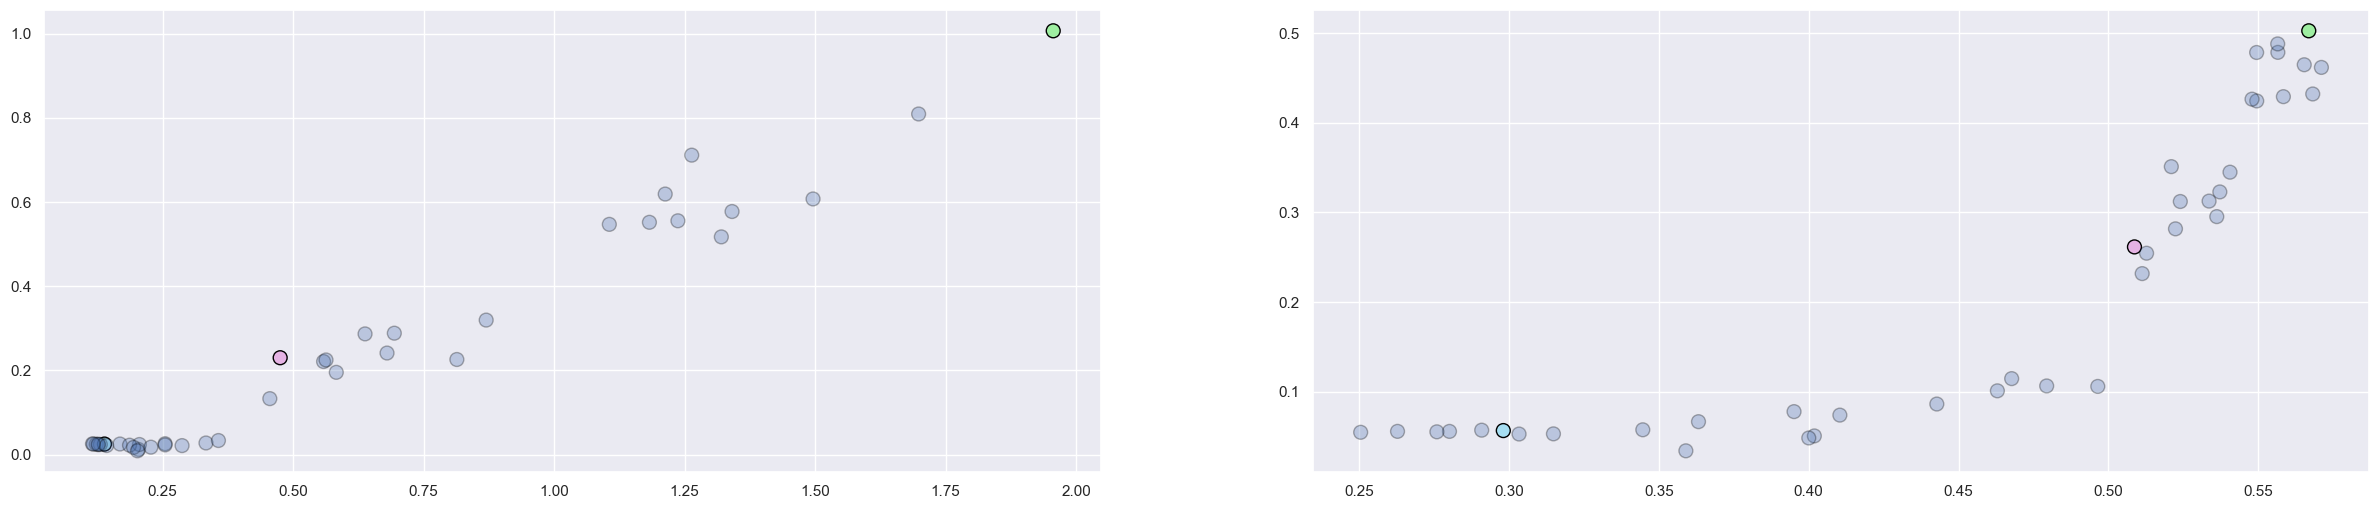

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(30,6))
ax1,ax2 = axs[0],axs[1]

ax1.scatter(rmsd_df["rmsd_avg"],stat_df["min_xray_rmsd_avg"], c=colors, alpha=alphas, s=100, edgecolors=edge_colors, marker="o")
ax2.scatter(rmsd_df["r_free"],stat_df["min_xray_r_free_0"], c=colors, alpha=alphas, s=100, edgecolors=edge_colors, marker="o")

# ax1.set(xlim=(xmin, xmax))
# ax2.set(xlim=(0, .6))

plt.savefig(Path(Path.home(), "Desktop/natives_correlation.png"))

In [50]:
stat_dfs = list() 
stat_df_jobs = ["69_native_1x_2", "70_native_2x_2", "71_native_4x_2"]
n_states = [1,2,4]

for i in range(len(stat_df_jobs)): 
    stat_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/3ca7/{}/score_analysis.csv".format(stat_df_jobs[i])))
    rmsd_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/17_synthetic_native/data/scores/{}_state_ref.csv".format(n_states[i])))
    
    stat_df = stat_df.merge(rmsd_df)
    stat_df = stat_df[stat_df["xray_0_min_0_rmsd_avg"] < 5.0]

    stat_dfs.append(stat_df)


In [51]:
stat_dfs[0].head()

,Unnamed: 0,min_xray,avg_min_xray,xray_0_min_0_r_free_0,xray_0_min_0_rmsd_avg,xray_0_min_0_pdb,native,pdb_file,r_free,r_work,r_all,ml,ff,rmsd_avg,rmsd_ord,rmsd_dom,weight_delta
0,0,3.822655,3.882436,0.066491,0.038818,/wynton/group/sali/mhancock/xray/sample_bench/...,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.355257,0.349202,0.349658,5.412294,5.429363,0.180712,0.180712,0.180712,0.0
1,1,3.898502,3.987013,0.070425,0.051552,/wynton/group/sali/mhancock/xray/sample_bench/...,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.465312,0.465537,0.465522,5.736718,5.429363,0.318483,0.318483,0.318483,0.0
2,2,3.834970,3.973291,0.065736,0.044402,/wynton/group/sali/mhancock/xray/sample_bench/...,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.386710,0.383558,0.383783,5.478936,5.429363,0.205096,0.205096,0.205096,0.0
3,3,3.843921,4.495686,0.067397,0.046718,/wynton/group/sali/mhancock/xray/sample_bench/...,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.357893,0.363619,0.363204,5.441196,5.429363,0.177475,0.177475,0.177475,0.0
4,4,3.732431,3.788843,0.059835,0.041009,/wynton/group/sali/mhancock/xray/sample_bench/...,0.0,/wynton/home/sali/mhancock/xray/data/pdbs/3ca7...,0.253118,0.259604,0.259142,5.174665,5.429363,0.102308,0.102308,0.102308,0.0


In [62]:
color_on = True 

colors = list() 
alphas = list() 
edge_colors = list() 

colors_dict = [{20: "#5873E3", 35: "#C21807"}, {26: "#5873E3", 25: "#C21807"}, {9: "#5873E3", 21: "#C21807"}]

for i in range(3):
    colors.append(list())
    alphas.append(list())
    edge_colors.append(list())
    for j in list(stat_dfs[i].index): 
        if j in colors_dict[i].keys() and color_on: 
            colors[i].append(colors_dict[i][j])
            alphas[i].append(1)
            edge_colors[i].append("black")
        else:
            colors[i].append("b")
            alphas[i].append(.2)
            edge_colors[i].append("none")

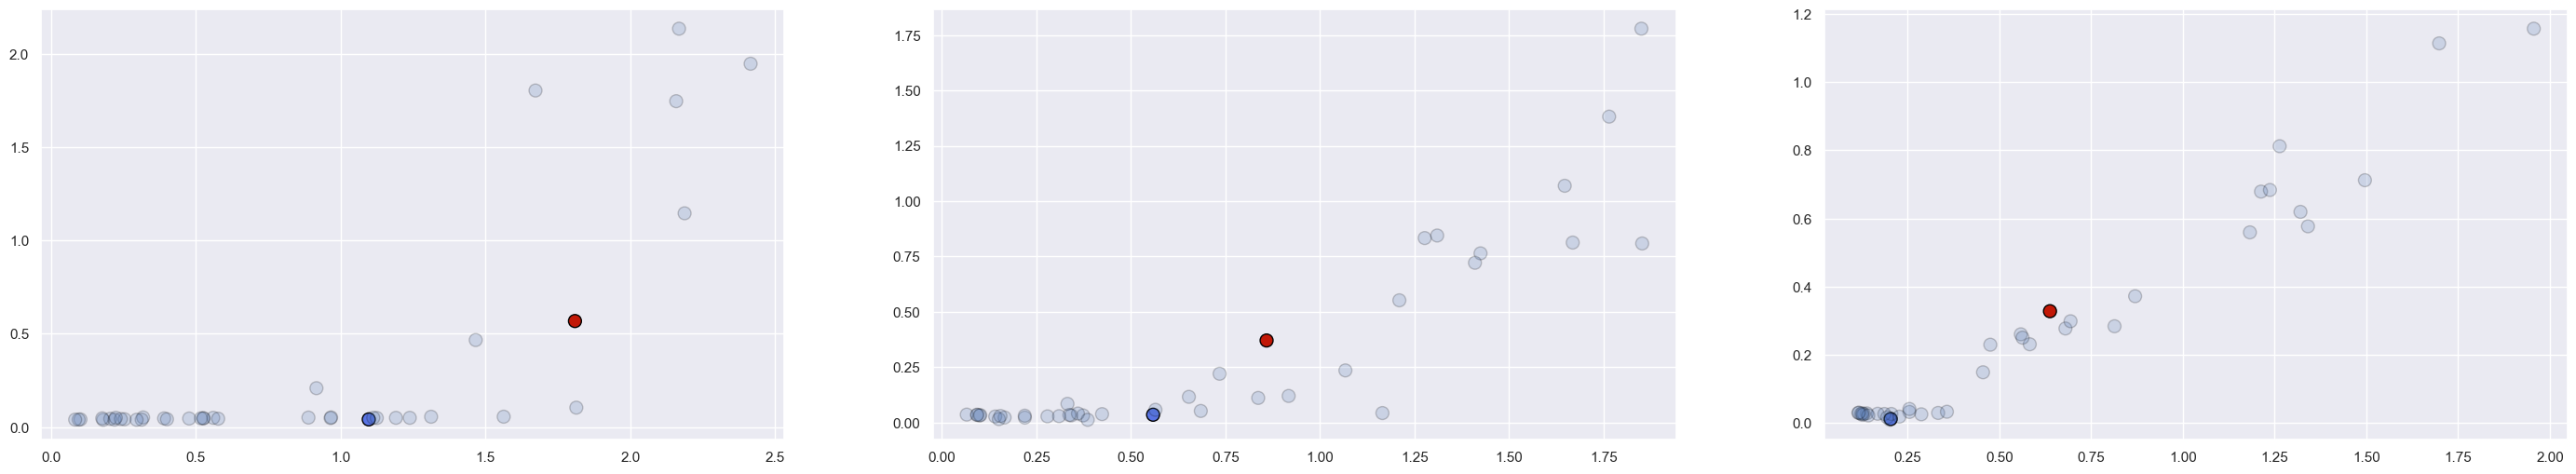

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(35,6))

# for i in range(1): 
for i in range(3):
    ax = axs[i]
    ax.scatter(stat_dfs[i]["rmsd_avg"],stat_dfs[i]["xray_0_min_0_rmsd_avg"], color=colors[i], alpha=alphas[i], s=100, edgecolors=edge_colors[i], marker="o")
    # ax.scatter(stat_dfs[i]["rmsd_avg"],stat_dfs[i]["xray_0_min_0_rmsd_avg"])

# ax1.set(xlim=(xmin, xmax))
# ax2.set(xlim=(0, .6))

plt.savefig(Path(Path.home(), "Desktop/natives_correlation.png"))

In [66]:
len(rmsd_dfs[2]["rmsd_avg"])

40